# Importation des librairies 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile


In [2]:
zp = zipfile.ZipFile('full-oldb-20220110.zip') 
# charge la dataset du fichier "nodes-addresses.csv"
adresse_tp = pd.read_csv(zp.open("nodes-addresses.csv"), low_memory=False, iterator=True, chunksize=1000)
adresse_df = pd.concat(adresse_tp, ignore_index=True)

# charge la dataset du fichier "nodes-officers.csv"
officer_tp = pd.read_csv(zp.open("nodes-officers.csv"), low_memory=False, iterator=True, chunksize=1000)
officer_df = pd.concat(officer_tp, ignore_index=True)

# charge la dataset du fichier "nodes-entities.csv"
entities_tp = pd.read_csv(zp.open("nodes-entities.csv"), low_memory=False, iterator=True, chunksize=1000)
entities_df = pd.concat(entities_tp, ignore_index=True)

# charge la dataset du fichier "relationship.csv"
relation_tp = pd.read_csv(zp.open("relationships.csv"), low_memory=False, iterator=True, chunksize=1000)
relation_df = pd.concat(relation_tp, ignore_index=True)

# Exercice I avec Pandas

    1. nombre de pays déclaré dans les offshores-leaks
    2. nombre d'occurence de 'Ireland' dans le fichier "nodes-addresses.csv"
    3. nombre de montage nommé 'EL PORTADOR' dans le fichier "nodes-officers.csv"

In [3]:
# compte le nombre de pays dans le fichier "nodes-addresses"
countries = adresse_df['countries'].drop_duplicates()
print(f"Nombre de pays déclarer: {countries.shape[0]}")

Nombre de pays déclarer: 238


In [4]:
# compte le nombre d'occurence de 'Irlande' dans le fichier "nodes-addresses"
number_ = adresse_df[adresse_df["countries"]=="Ireland"].shape[0]
print(f'Le mot \'Irlande\' se trouve dans {number_} entrées')


Le mot 'Irlande' se trouve dans 899 entrées


In [5]:
number_ = officer_df[officer_df["name"]=="EL PORTADOR"].shape[0]
print(f'Le mot \'EL PORTADOR\' se trouve dans {number_} montages')

Le mot 'EL PORTADOR' se trouve dans 9325 montages


# Exercice II avec Seaborn

    1. Histogramme des pays déclaré dans les offshores-leaks
    2. Nombre des pays les plus déclarés

<AxesSubplot:xlabel='country_codes', ylabel='count'>

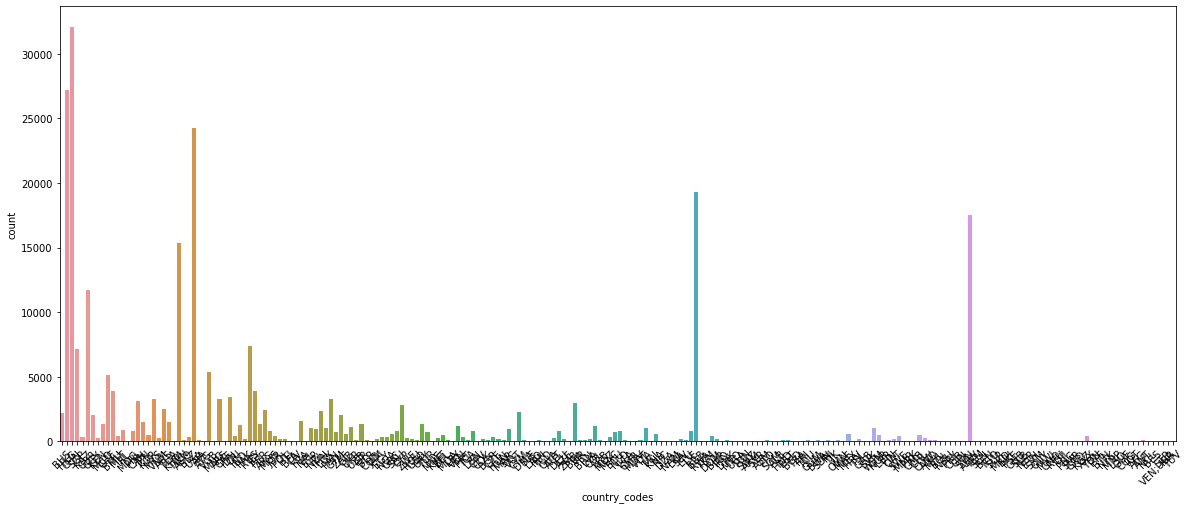

In [9]:
# dataset
plt.figure(figsize = (20, 8))
plt.xticks(rotation=45)
sb.countplot(x="country_codes", data=adresse_df)

**Est-ce que ce graphe suis une loi normale ?**

- *Ce graphe ne suis pas une loi normale.*

In [7]:
# Liste des 20 des pays les plus déclarrés
adresse_df.countries.value_counts().head(20)

China                     32067
Hong Kong                 27179
United States             24248
Barbados                  19344
Aruba                     17512
Taiwan                    15326
United Kingdom            11706
Singapore                  7149
Russia                     5963
British Virgin Islands     5282
Switzerland                5113
Jersey                     3932
Bermuda                    3920
Indonesia                  3412
United Arab Emirates       3283
Panama                     3257
Malaysia                   3241
Canada                     3139
Brazil                     2979
Cyprus                     2842
Name: countries, dtype: int64

# Reconstruction de la base de données

 *("officer --- officer of ---> entity")*

In [8]:
# merge
df = pd.merge(officer_df, relation_df, how="inner", left_on="_id", right_on="_start")
m = df.merge(entities_df, how="inner", left_on="_end", right_on="_id")
m

,_id_x,node_id_x,name_x,countries_x,country_codes_x,sourceID_x,valid_until_x,note_x,_start,_end,...,struck_off_date,dorm_date,status_y,service_provider,ibcRUC,country_codes_y,countries_y,sourceID,valid_until_y,note_y
0,228598,12000001,KIM SOO IN,South Korea,KOR,Panama Papers,The Panama Papers data is current through 2015,NaN,228598,74508,...,31-OCT-2007,NaN,Defaulted,Mossack Fonseca,211317.0,USA,United States,Panama Papers,The Panama Papers data is current through 2015,NaN
1,323378,12097201,SONG SI HAN,South Korea,KOR,Panama Papers,The Panama Papers data is current through 2015,NaN,323378,74508,...,31-OCT-2007,NaN,Defaulted,Mossack Fonseca,211317.0,USA,United States,Panama Papers,The Panama Papers data is current through 2015,NaN
2,326697,12100428,HYUN MYUNG CHUL,Russia,RUS,Panama Papers,The Panama Papers data is current through 2015,NaN,326697,74508,...,31-OCT-2007,NaN,Defaulted,Mossack Fonseca,211317.0,USA,United States,Panama Papers,The Panama Papers data is current through 2015,NaN
3,335419,12109116,KIM WALTER YANGHOON,United States,USA,Panama Papers,The Panama Papers data is current through 2015,NaN,335419,74508,...,31-OCT-2007,NaN,Defaulted,Mossack Fonseca,211317.0,USA,United States,Panama Papers,The Panama Papers data is current through 2015,NaN
4,431596,12205214,MALIVANOV SERGUEI,Hong Kong,HKG,Panama Papers,The Panama Papers data is current through 2015,NaN,431596,74508,...,31-OCT-2007,NaN,Defaulted,Mossack Fonseca,211317.0,USA,United States,Panama Papers,The Panama Papers data is current through 2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695862,1969294,240050867,HASHEM KHOSROVANI,United Arab Emirates,ARE;CHE,"Pandora Papers - Alemán, Cordero, Galindo & Le...",Provider data is current through 2017,NaN,1969294,1607897,...,NaN,NaN,Active,NaN,1558911,VGB,British Virgin Islands,"Pandora Papers - Alemán, Cordero, Galindo & Le...",Provider data is current through 2017,NaN
1695863,1969304,240069001,Edgardo Eloy Díaz,Panama,PAN,"Pandora Papers - Alemán, Cordero, Galindo & Le...",Pandora Papers - Alcogal data is current throu...,NaN,1969304,1969303,...,NaN,NaN,Dissolved,NaN,NaN,BLZ,Belize,"Pandora Papers - Alemán, Cordero, Galindo & Le...",Pandora Papers - Alcogal data is current throu...,NaN
1695864,1969305,240069002,José Creuheras Margenat,Spain,ESP,"Pandora Papers - Alemán, Cordero, Galindo & Le...",Pandora Papers - Alcogal data is current throu...,NaN,1969305,1969303,...,NaN,NaN,Dissolved,NaN,NaN,BLZ,Belize,"Pandora Papers - Alemán, Cordero, Galindo & Le...",Pandora Papers - Alcogal data is current throu...,NaN
1695865,1969306,240069003,Columna Marti Pico,NaN,NaN,"Pandora Papers - Alemán, Cordero, Galindo & Le...",Pandora Papers - Alcogal data is current throu...,NaN,1969306,1969303,...,NaN,NaN,Dissolved,NaN,NaN,BLZ,Belize,"Pandora Papers - Alemán, Cordero, Galindo & Le...",Pandora Papers - Alcogal data is current throu...,NaN


# Exercice III

    1. Nombre de service providers déclarés dans les offshore-leaks
    2. Proportion de ses services providers vis à vis des officier

In [9]:
service_providers = m['service_provider'].drop_duplicates()
print(f"Nombre de services providers déclarer: {service_providers.shape[0]}")

Nombre de services providers déclarer: 5


In [16]:
officers = m['name_x'].drop_duplicates()
print(f"Nombre d'officiers: {officers.shape[0]}")

Nombre d'officiers: 523454


In [23]:
# merge
prop = m[["name_x", "service_provider"]].groupby("service_provider").count()
prop.columns = ["Nombre d'officiers affectés"]
prop

,Nombre d'officiers affectés
service_provider,
Appleby,241779
Commonwealth Trust Limited,62422
Mossack Fonseca,309354
Portcullis Trustnet,234647
